In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib
import seaborn as sns
import csv
import re 
from matplotlib import pyplot as plt
from sklearn import ensemble, cross_validation, learning_curve, metrics , tree, naive_bayes, utils
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import load_digits, load_breast_cancer, load_iris, load_boston
from sklearn.cross_validation import cross_val_score, KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.preprocessing import StandardScaler, scale, OneHotEncoder
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
boston = load_boston()

In [15]:
X = boston['data']
y = boston['target']

In [7]:
X_scaled = scale(X)

In [10]:
p_arr = np.linspace(1, 10, 200)

(506, 13)

In [11]:
kf_cv = KFold(n=X_scaled.shape[0], n_folds=5, shuffle=True, random_state=42)

In [19]:
scores = []
for p in p_arr:
    reg = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p)
    scores.append(cross_val_score(reg, X_scaled, y, scoring='mean_squared_error',
                                  cv=kf_cv).mean())

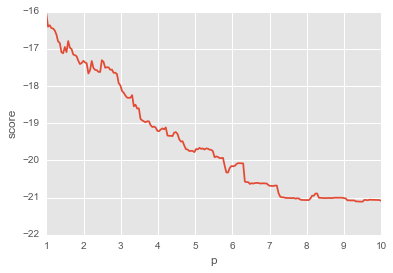

In [20]:
plt.plot(p_arr, scores)
plt.xlabel('p')
plt.ylabel('score')

In [21]:
p_arr[0]

1.0

In [24]:
def write_answer(y_pred, col_id):
    answer_df = pd.concat([col_id, y_pred], axis=1)
    answer_df.to_csv('my_submission')